# Fourier series

Any periodic function can be expressed as a summation of an infinite series of trigionometric (sine and cosine) terms, such a representation is called a Fourier series.

The most common form a Fourier series is,
$$f(x) = \frac{a_0}{2} + \sum_{n=1}^\infty \left[ a_n \cdot cos(nx) + b_n \cdot sin(nx) \right]$$
which interpolates a periodic function of period $2\pi$.

For a generic periodic function $f(x)$, having period $2l$, the Fourier series is represented as,
$$f(x) = \frac{a_0}{2} + \sum_{n=1}^\infty \left[ a_n \cdot cos\left(\frac{n\pi}{l} x\right) + b_n \cdot sin\left(\frac{n\pi}{l} x\right) \right]$$

The coefficients $a_n$ and $b_n$ to the sine and cosine terms, can be eveluated as follows,
$$a_n = \frac{1}{l} \int_{-l}^{l} f(x) \cdot cos\left(\frac{n\pi}{l} x\right) dx$$
$$b_n = \frac{1}{l} \int_{-l}^{l} f(x) \cdot sin\left(\frac{n\pi}{l} x\right) dx$$

## Code

In [1]:
from numpy import cos, empty, pi, sin, vectorize
from matplotlib import pyplot as plt

# Default configuaration for matplotlib
plt.style.use(['science', 'ieee'])
plt.rcParams["figure.figsize"] = (10, 5)


In [2]:
# Function to generate `n` evenly space points between limits `a` and `b`
def generate_points(a, b, n, retstep=False):

    # Calculating the spacing (difference) between each points
    h = (b - a) / (n - 1)

    # Creating an empty array to store the points
    points = empty(n)

    # Generating the points
    for i in range(n):
        points[i] = a
        a += h

    # Returning the difference between each points if asked for
    if retstep:
        return points, h

    return points


In [3]:
# Importing code for Simson's method for integration
def integrate_simpson(f, x_i, x_f, n):

    # Checking if interation using Simpson's method is possible
    if n % 2 == 0 or n < 2:
        raise ValueError(
            "Intergration using Simpson's method can only be evaluated for odd number of points greater than 2!")

    # Generating points
    x, h = generate_points(x_i, x_f, n, retstep=True)

    # Evaluating the function `f(x)` for each points
    y = f(x)

    # Declaring a variable to store the integral
    integral = 0

    # Evaluating the integral using Simpson's method
    for i in range(n):
        if i == 0 or i == (n - 1):
            integral += y[i]
        elif i % 2 == 0:
            integral += y[i] * 2
        elif i % 2 == 1:
            integral += y[i] * 4

    integral *= (h / 3)

    return integral


In [4]:
# Function for evaluating coefficients to the sine and cosine terms of Fourier series
def evaluate_fourier_coeff(f, a, b, n, integration_points=10**3+1):

    # Calculating the half-period of the fuction and storing it
    half_period = 0.5 * (b - a)

    # Creating an empty array to store the Fourier coefficients
    fourier_coeff = empty((n, 2))

    # Evaluating the Fourier coefficients
    for i in range(n):
        fourier_coeff[i][0] = (1 / half_period) * integrate_simpson(
            (lambda x: f(x) * cos(i * (pi * x / half_period))), a, b, integration_points)
        fourier_coeff[i][1] = (1 / half_period) * integrate_simpson(
            (lambda x: f(x) * sin(i * (pi * x / half_period))), a, b, integration_points)

    return fourier_coeff


In [5]:
# Function to evaluate Fourier approximation using the Fourier coefficients
def evaluate_fourier_approx(x, fourier_coeff, half_period):

    # Declaring a variable to store the Fourier approximation and initialising it with 0.5 times the first Fourier cosine coeficient `a_0`
    fourier_approx = fourier_coeff[0][0] * 0.5

    # Evaluating the Fourier approximation using the Fourier coefficients
    for i in range(1, fourier_coeff.shape[0]):
        fourier_approx += (fourier_coeff[i][0] * cos(i * (pi * x / half_period))) + (
            fourier_coeff[i][1] * sin(i * (pi * x / half_period)))

    return fourier_approx


In [6]:
# Fuction to evaluate and plot Fourier approximation
def fourier_plot(f, a, b, n_coeffcients, plotting_a, plotting_b, plotting_points=10**3+1):

    # Generating points for plotting Fourier approximation
    points = generate_points(plotting_a, plotting_b, plotting_points)

    # Evaluating the maximum number of Fourier coefficients required for plot
    fourier_coeff = evaluate_fourier_coeff(f, a, b, max(n_coeffcients))

    # Plotting the Fourier approximation for different number of Fourier coefficients
    for n in n_coeffcients:

        # Evaluating the Fourier approximation using different number of Fourier coefficients
        fourier_approx = evaluate_fourier_approx(
            points, fourier_coeff[:n], 0.5 * (b - a))

        # Ploting the Fourier approximation
        plt.plot(points, fourier_approx, label=f"$f_{{fourier}}(x, n = {n})$")

    # Ploting the original function in its period
    points_period = generate_points(a, b, plotting_points // 10)
    plt.plot(points_period, f(points_period), ".",
             alpha=0.25, label="$f_{analytical}(x)$")

    plt.legend()
    plt.show()


## Examples

### $$f(x) = x^2,\ x \in [-\pi, \pi]$$

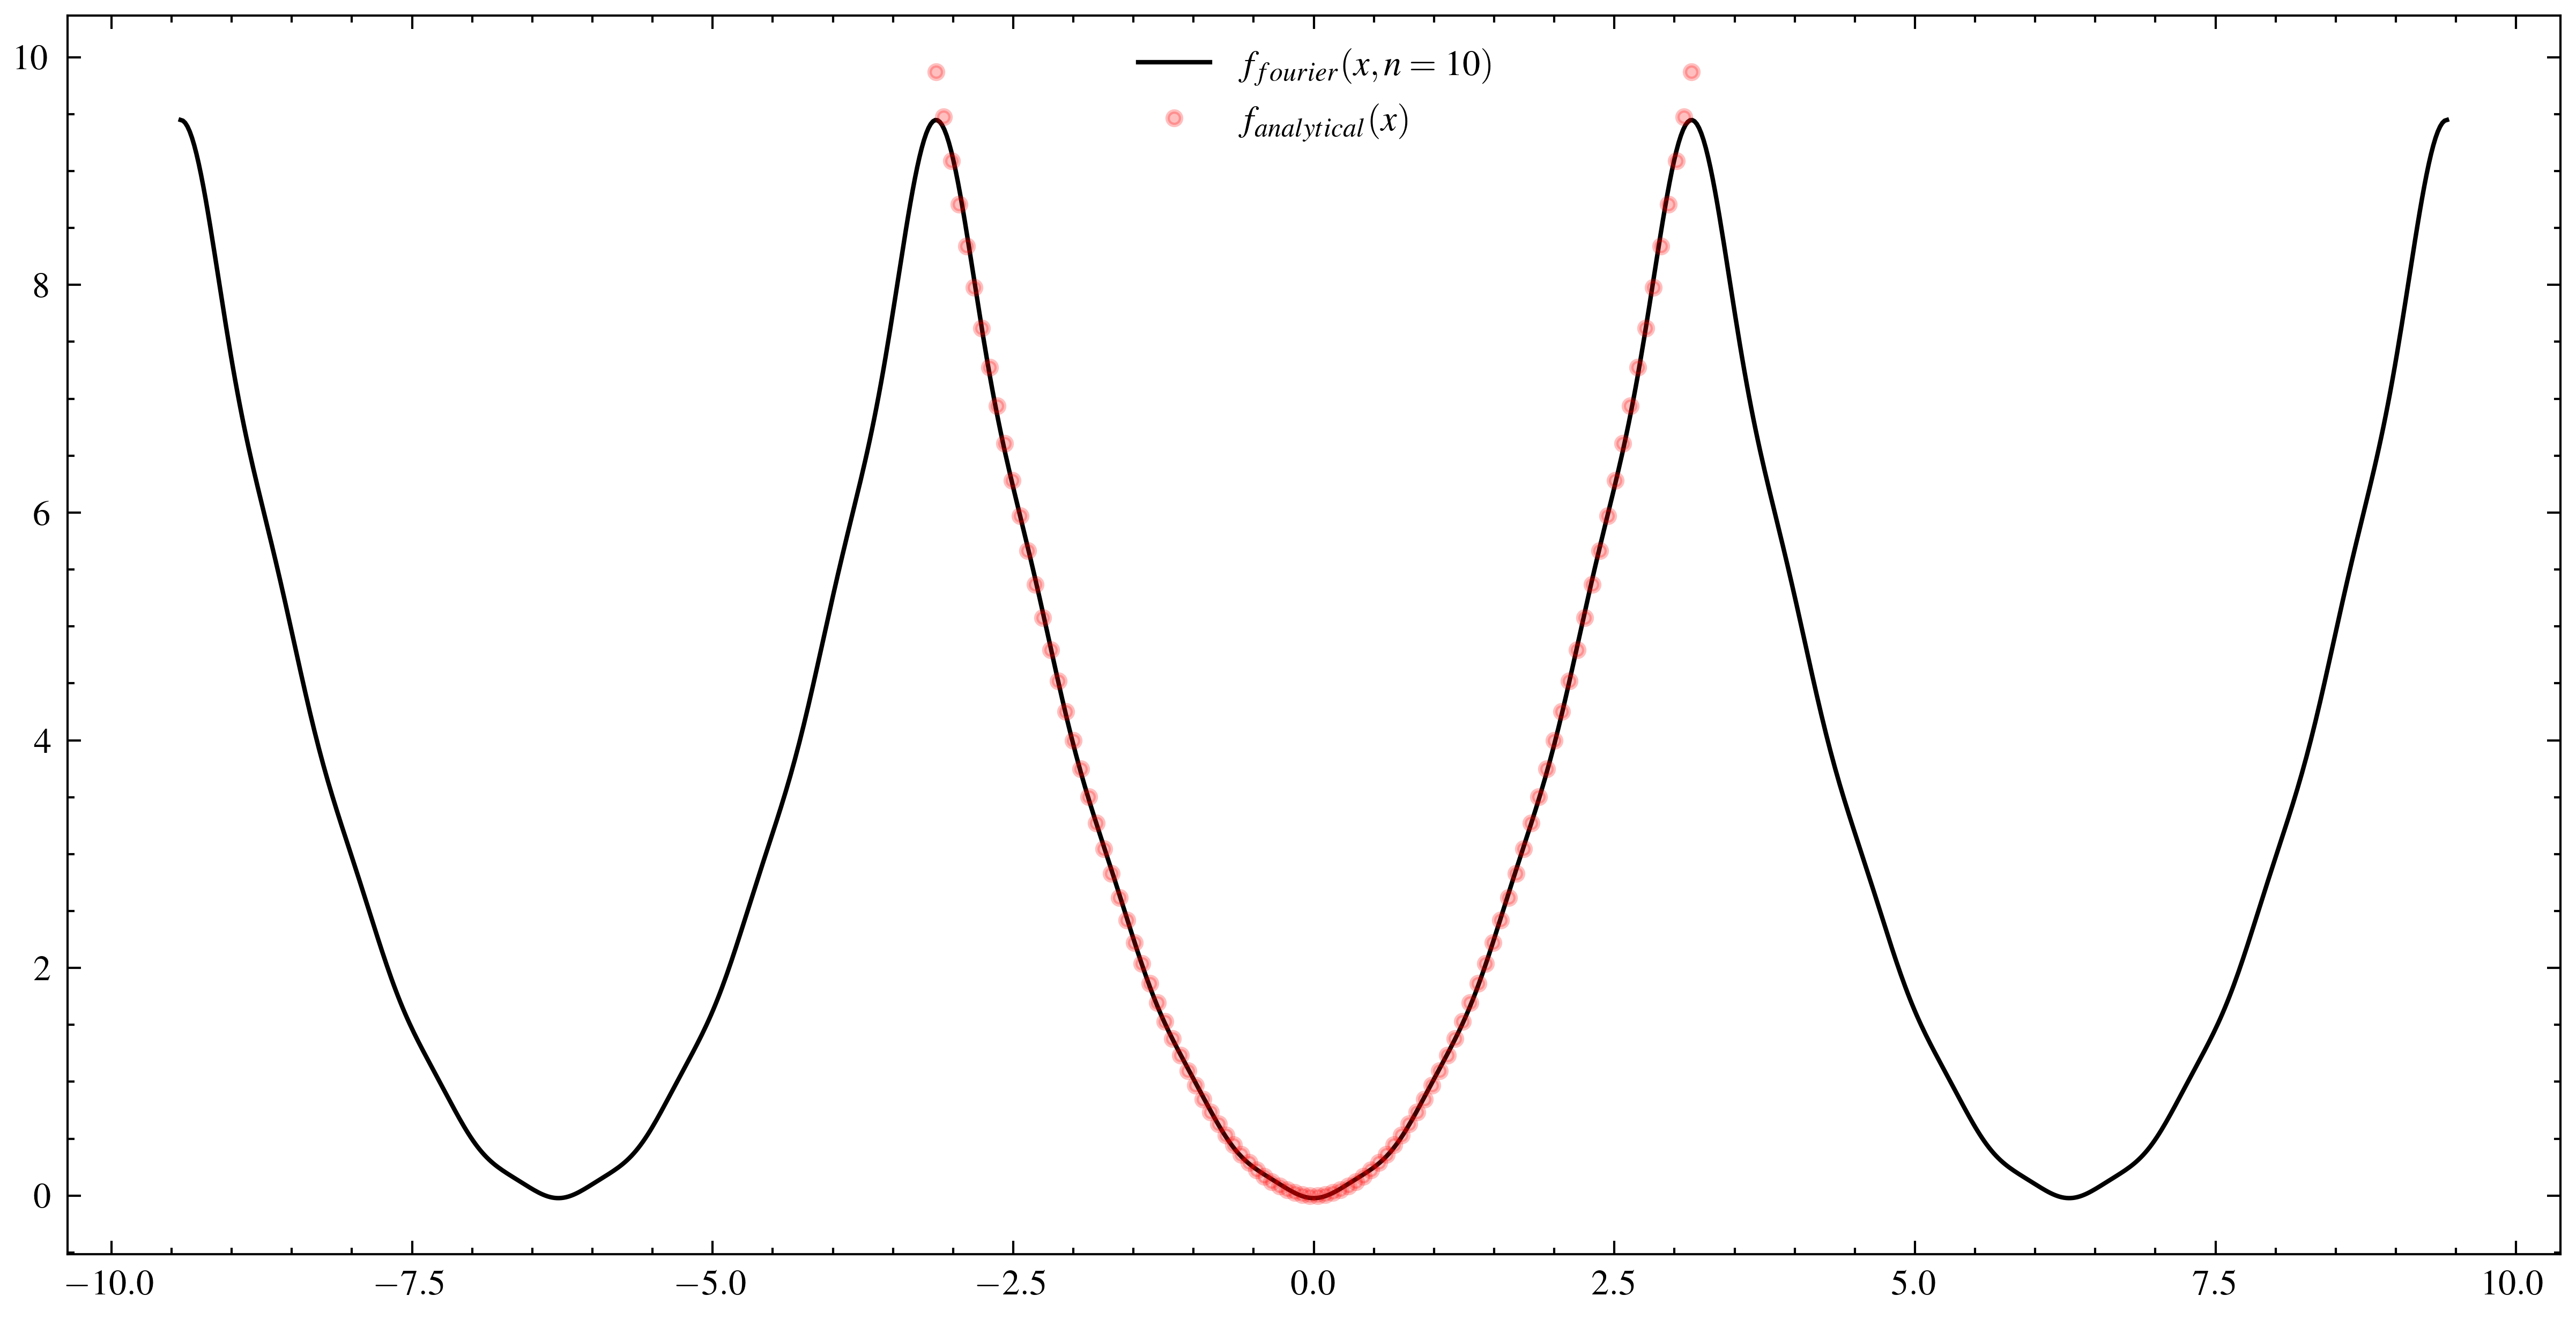

In [7]:
def f(x):
    return x**2


a = - pi
b = pi
n_coeffcients = [10]

fourier_plot(f, a, b, n_coeffcients, 3*a, 3*b)


### $$f(x) = x,\ x \in [-\pi, \pi]$$

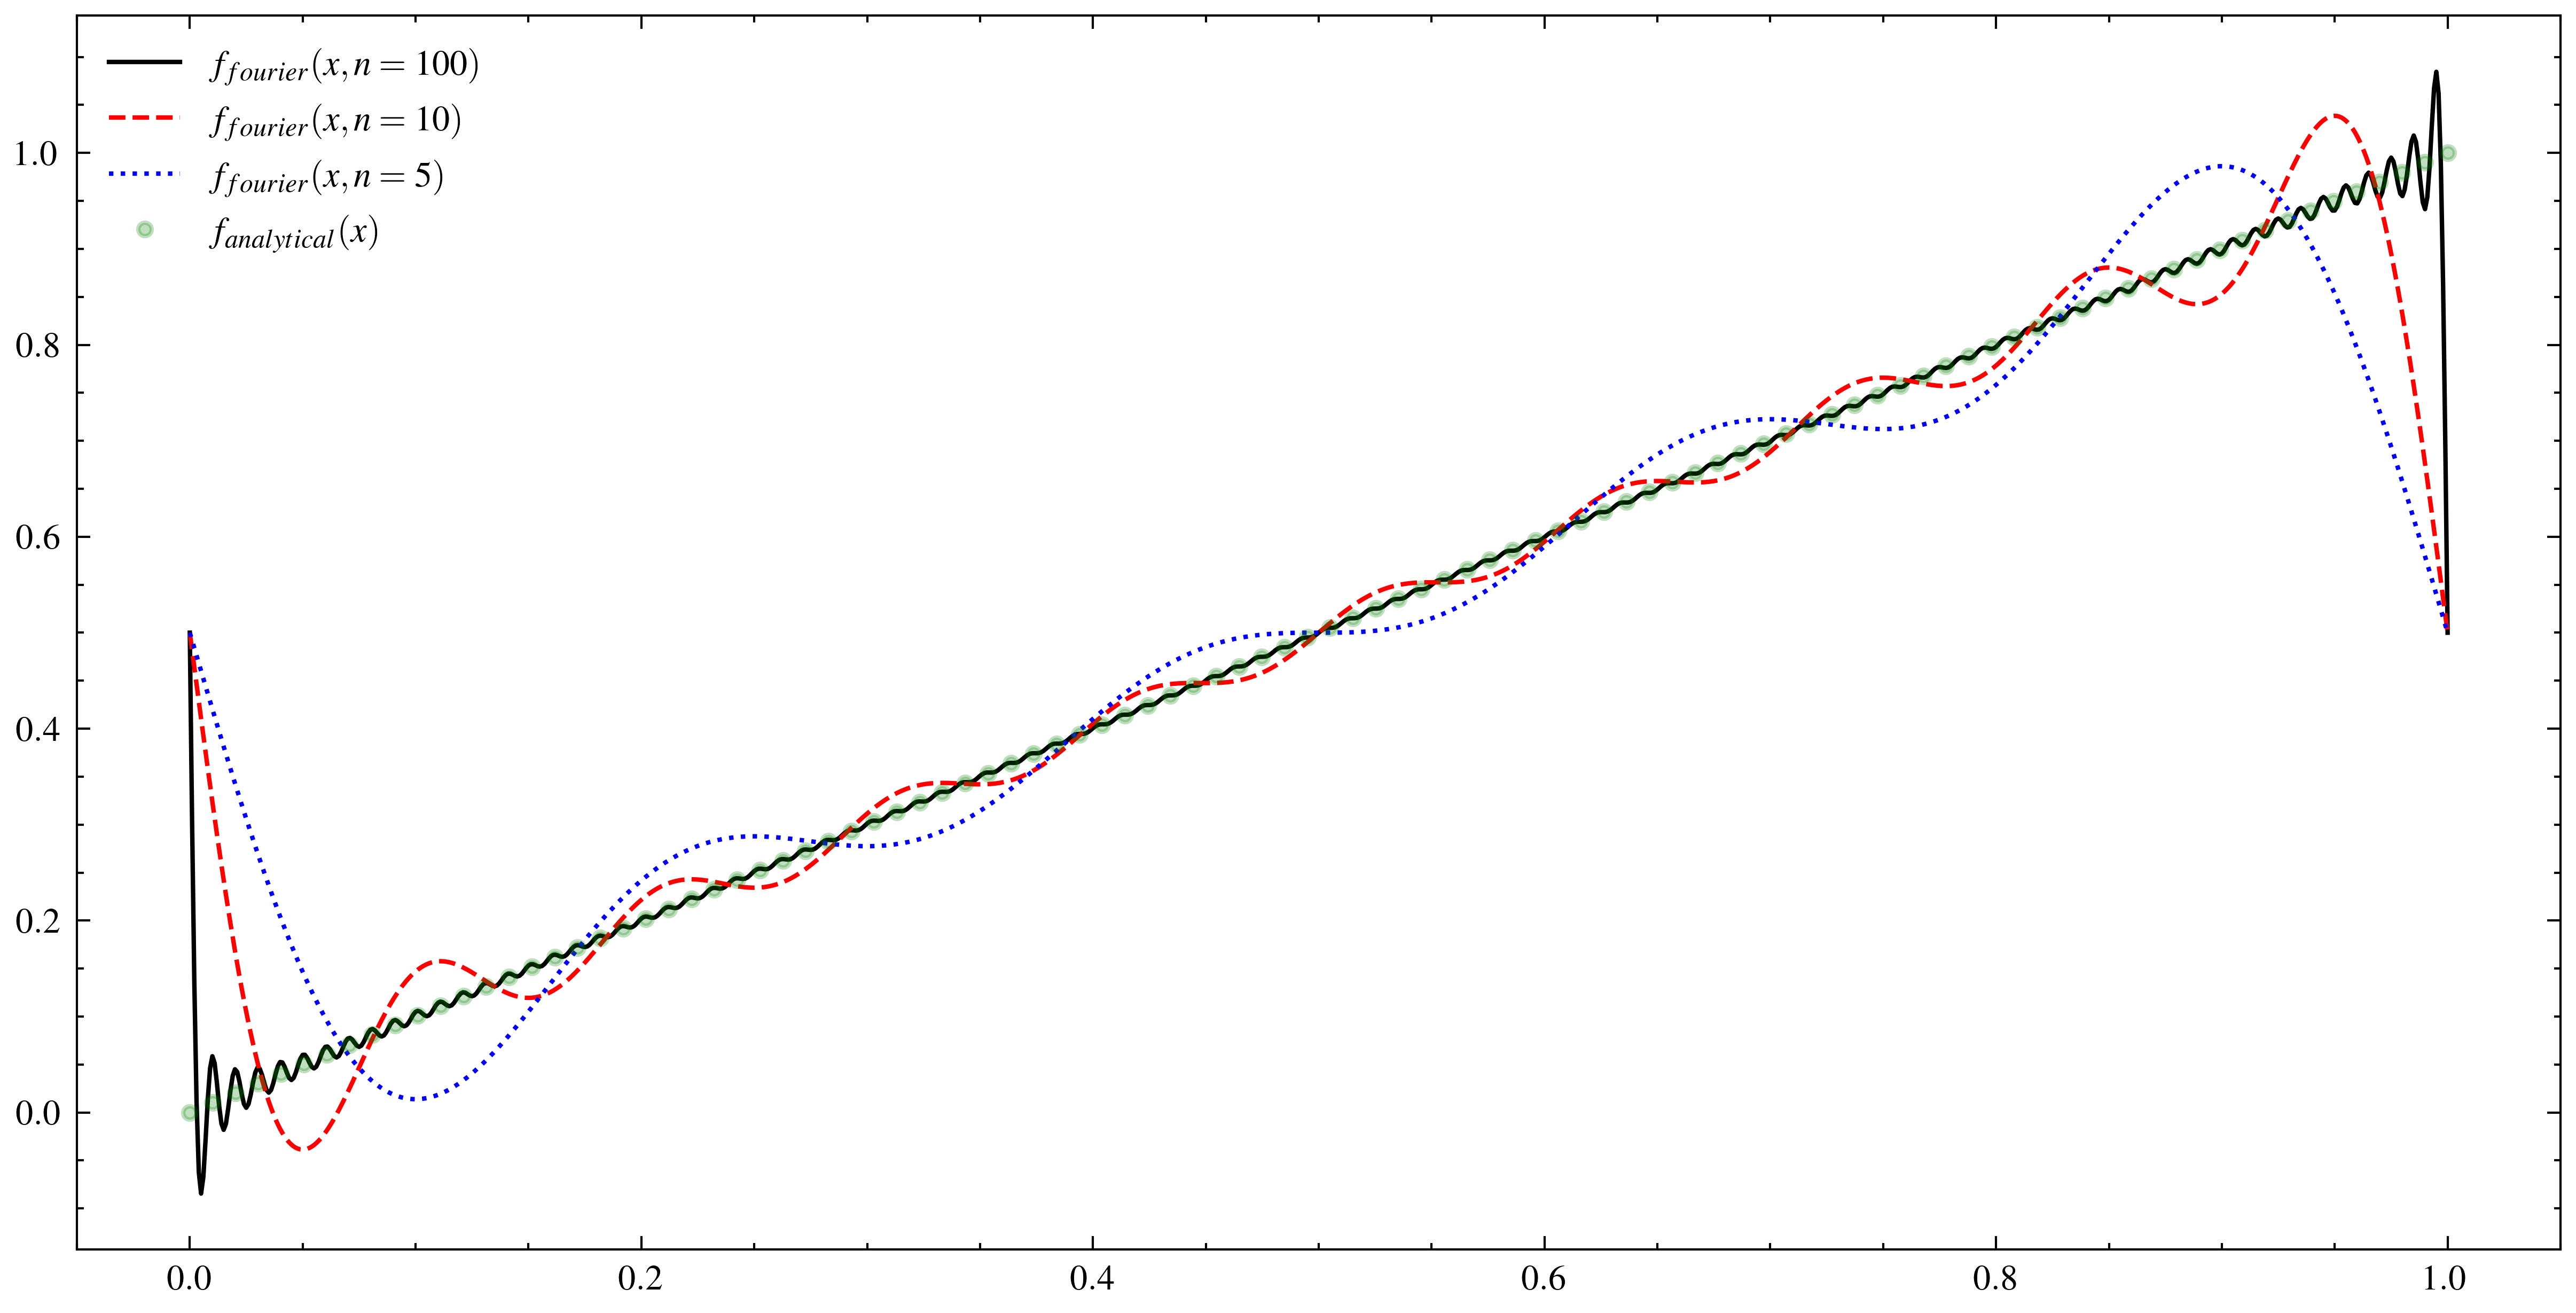

In [8]:
def f(x):
    return x


a = 0
b = 1
n_coeffcients = [100, 10, 5]

fourier_plot(f, a, b, n_coeffcients, a, b)


### $$f(x) = 1 - |x|,\ x \in [-\pi, \pi]$$

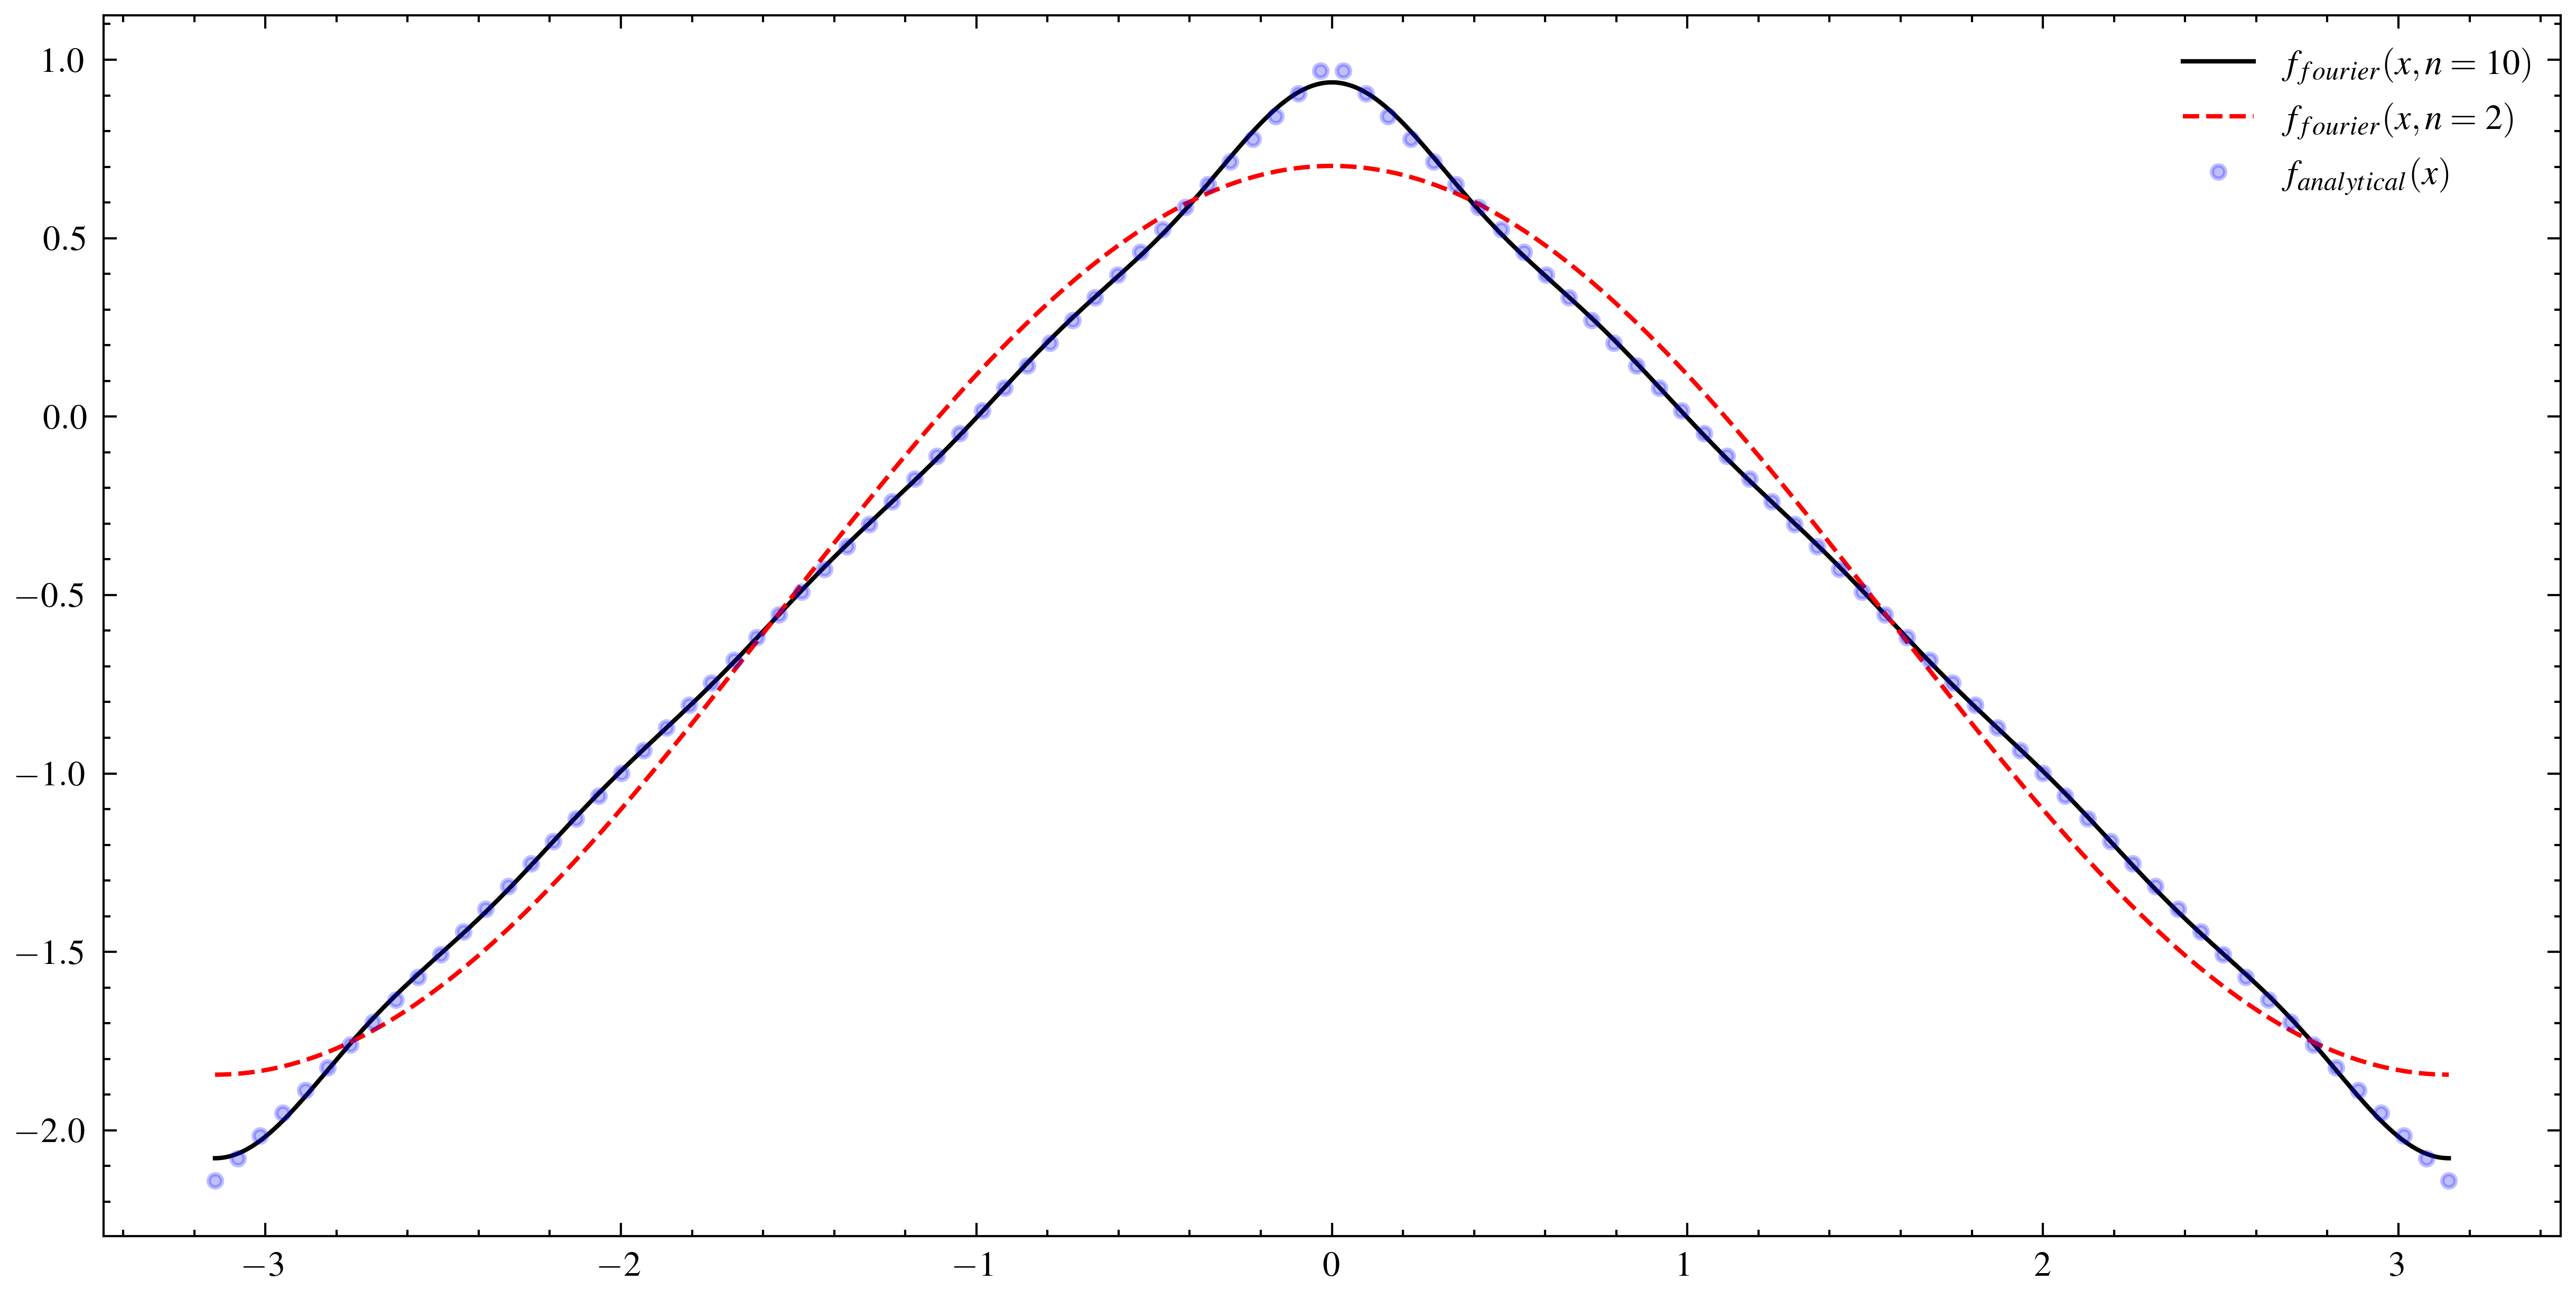

In [9]:
def f(x):
    return 1 - abs(x)


a = - pi
b = pi
n_coeffcients = [10, 2]

fourier_plot(f, a, b, n_coeffcients, a, b)


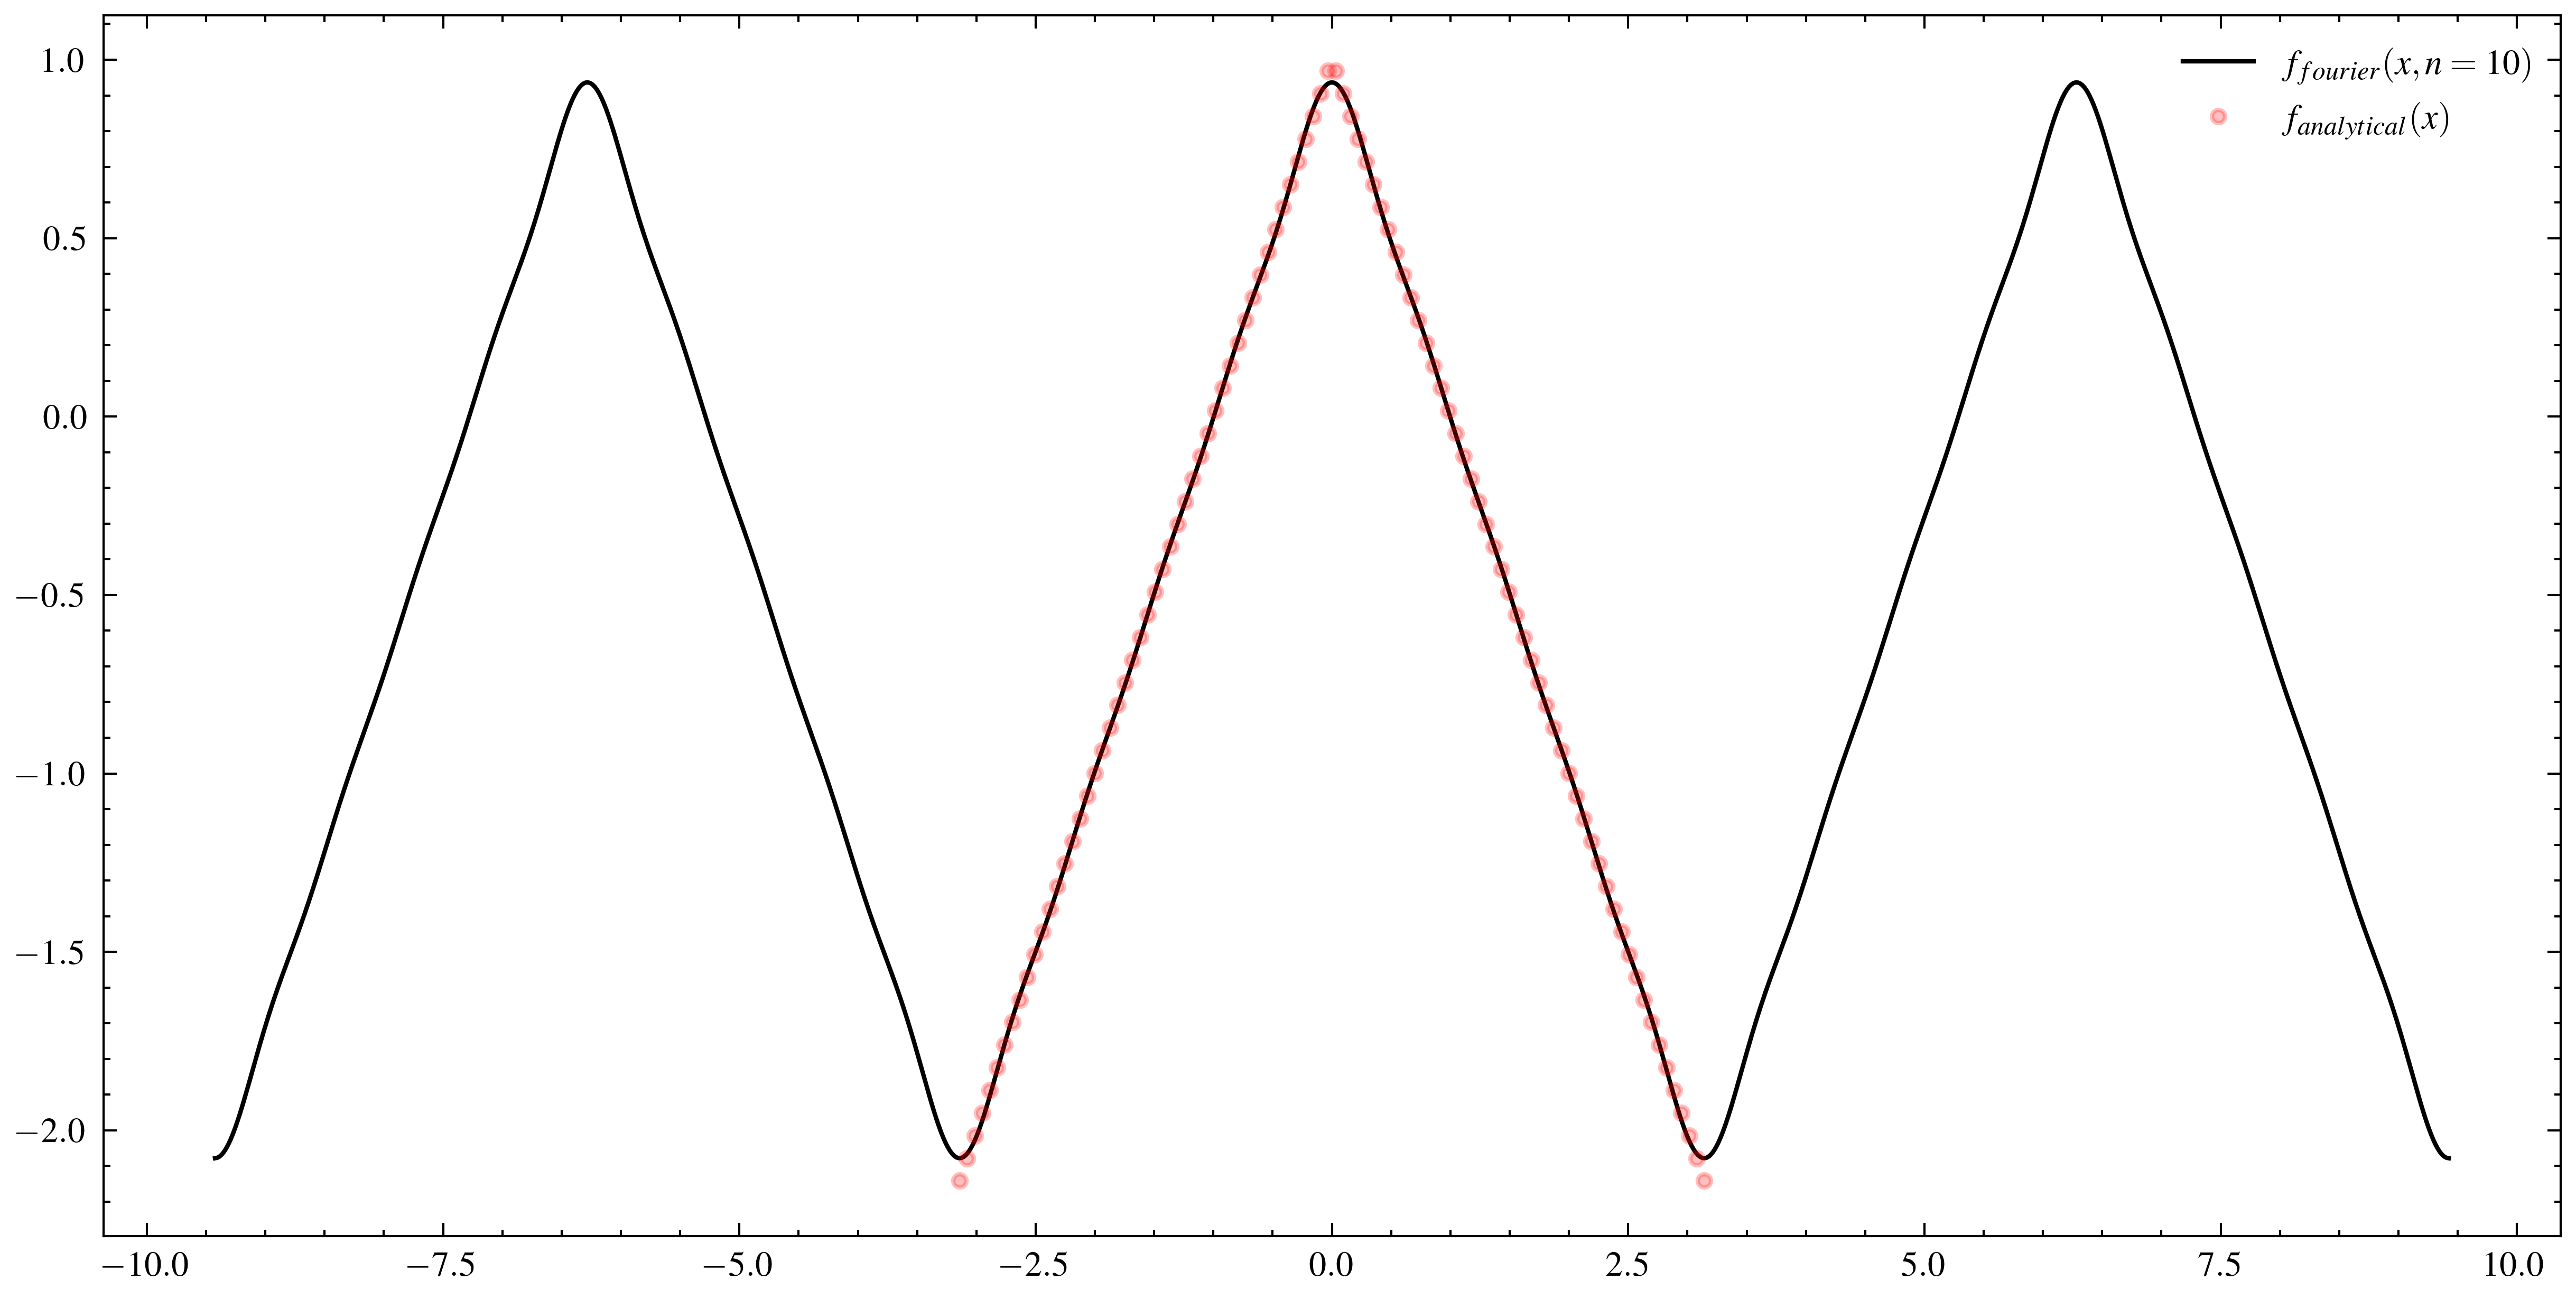

In [10]:
n_coeffcients = [10]

fourier_plot(f, a, b, n_coeffcients, 3*a, 3*b)


### $$f(x) = \begin{cases} 1, & x \in [-1, 0] \\ -1, & x \in [0, 1] \end{cases}$$

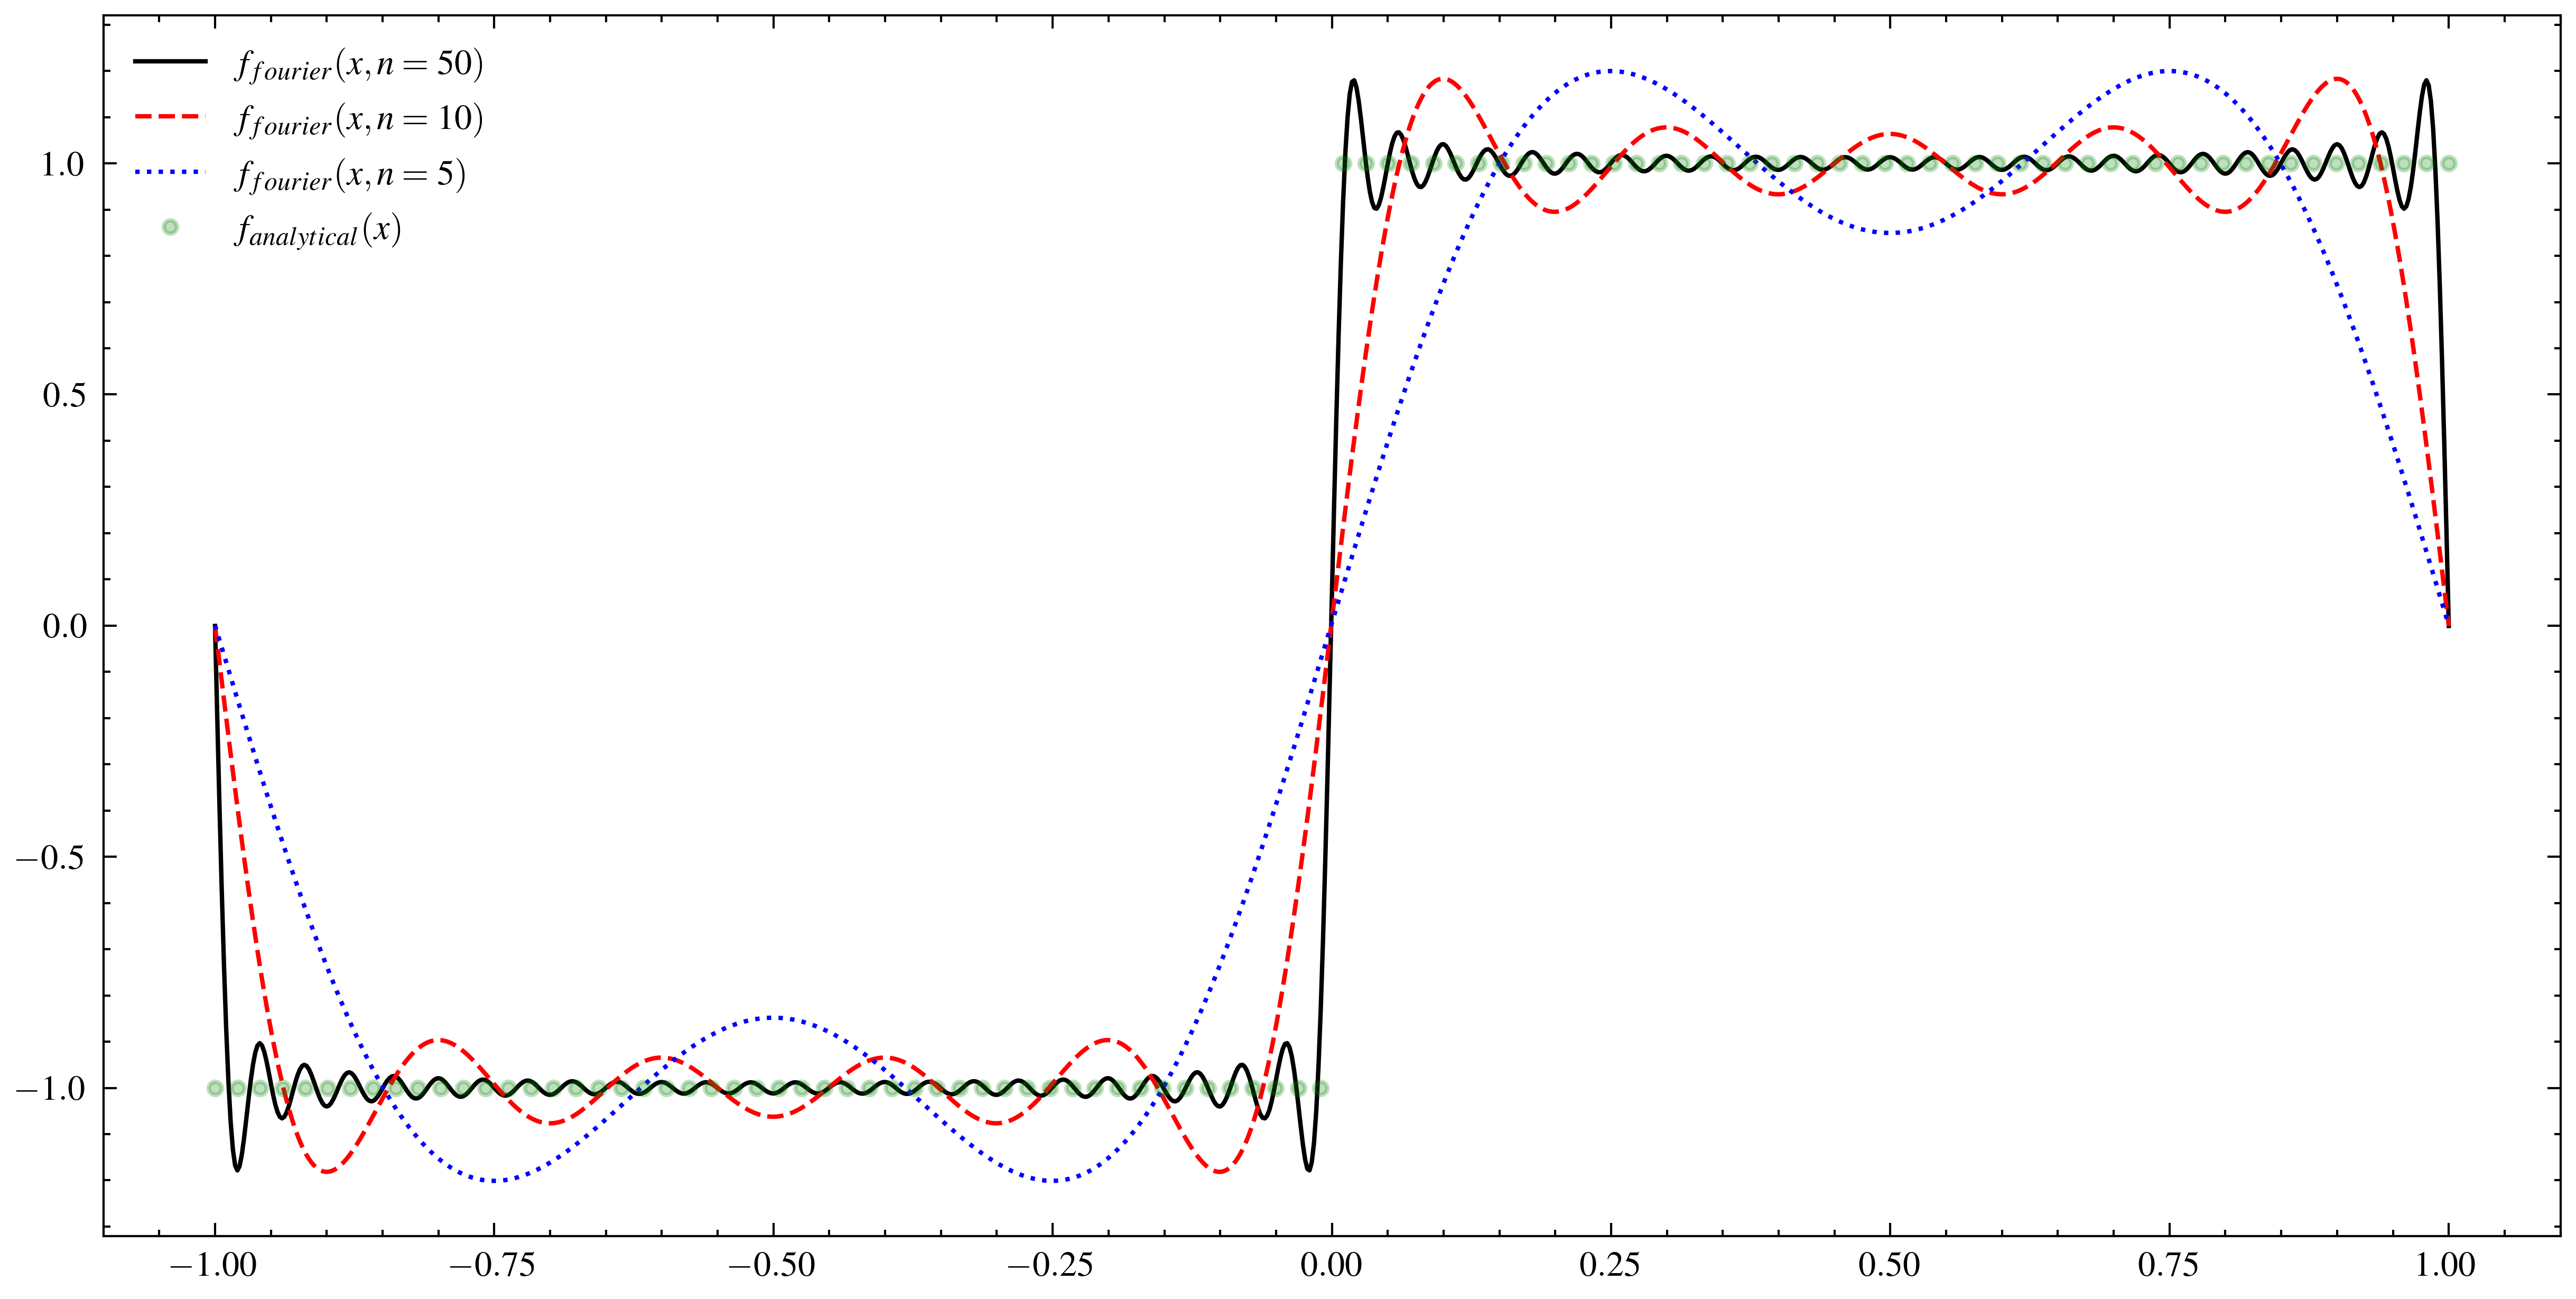

In [11]:
def f(x):
    if x > 0:
        return 1
    else:
        return -1


f = vectorize(f)
a = - 1
b = 1
n_coeffcients = [50, 10, 5]

fourier_plot(f, a, b, n_coeffcients, a, b)


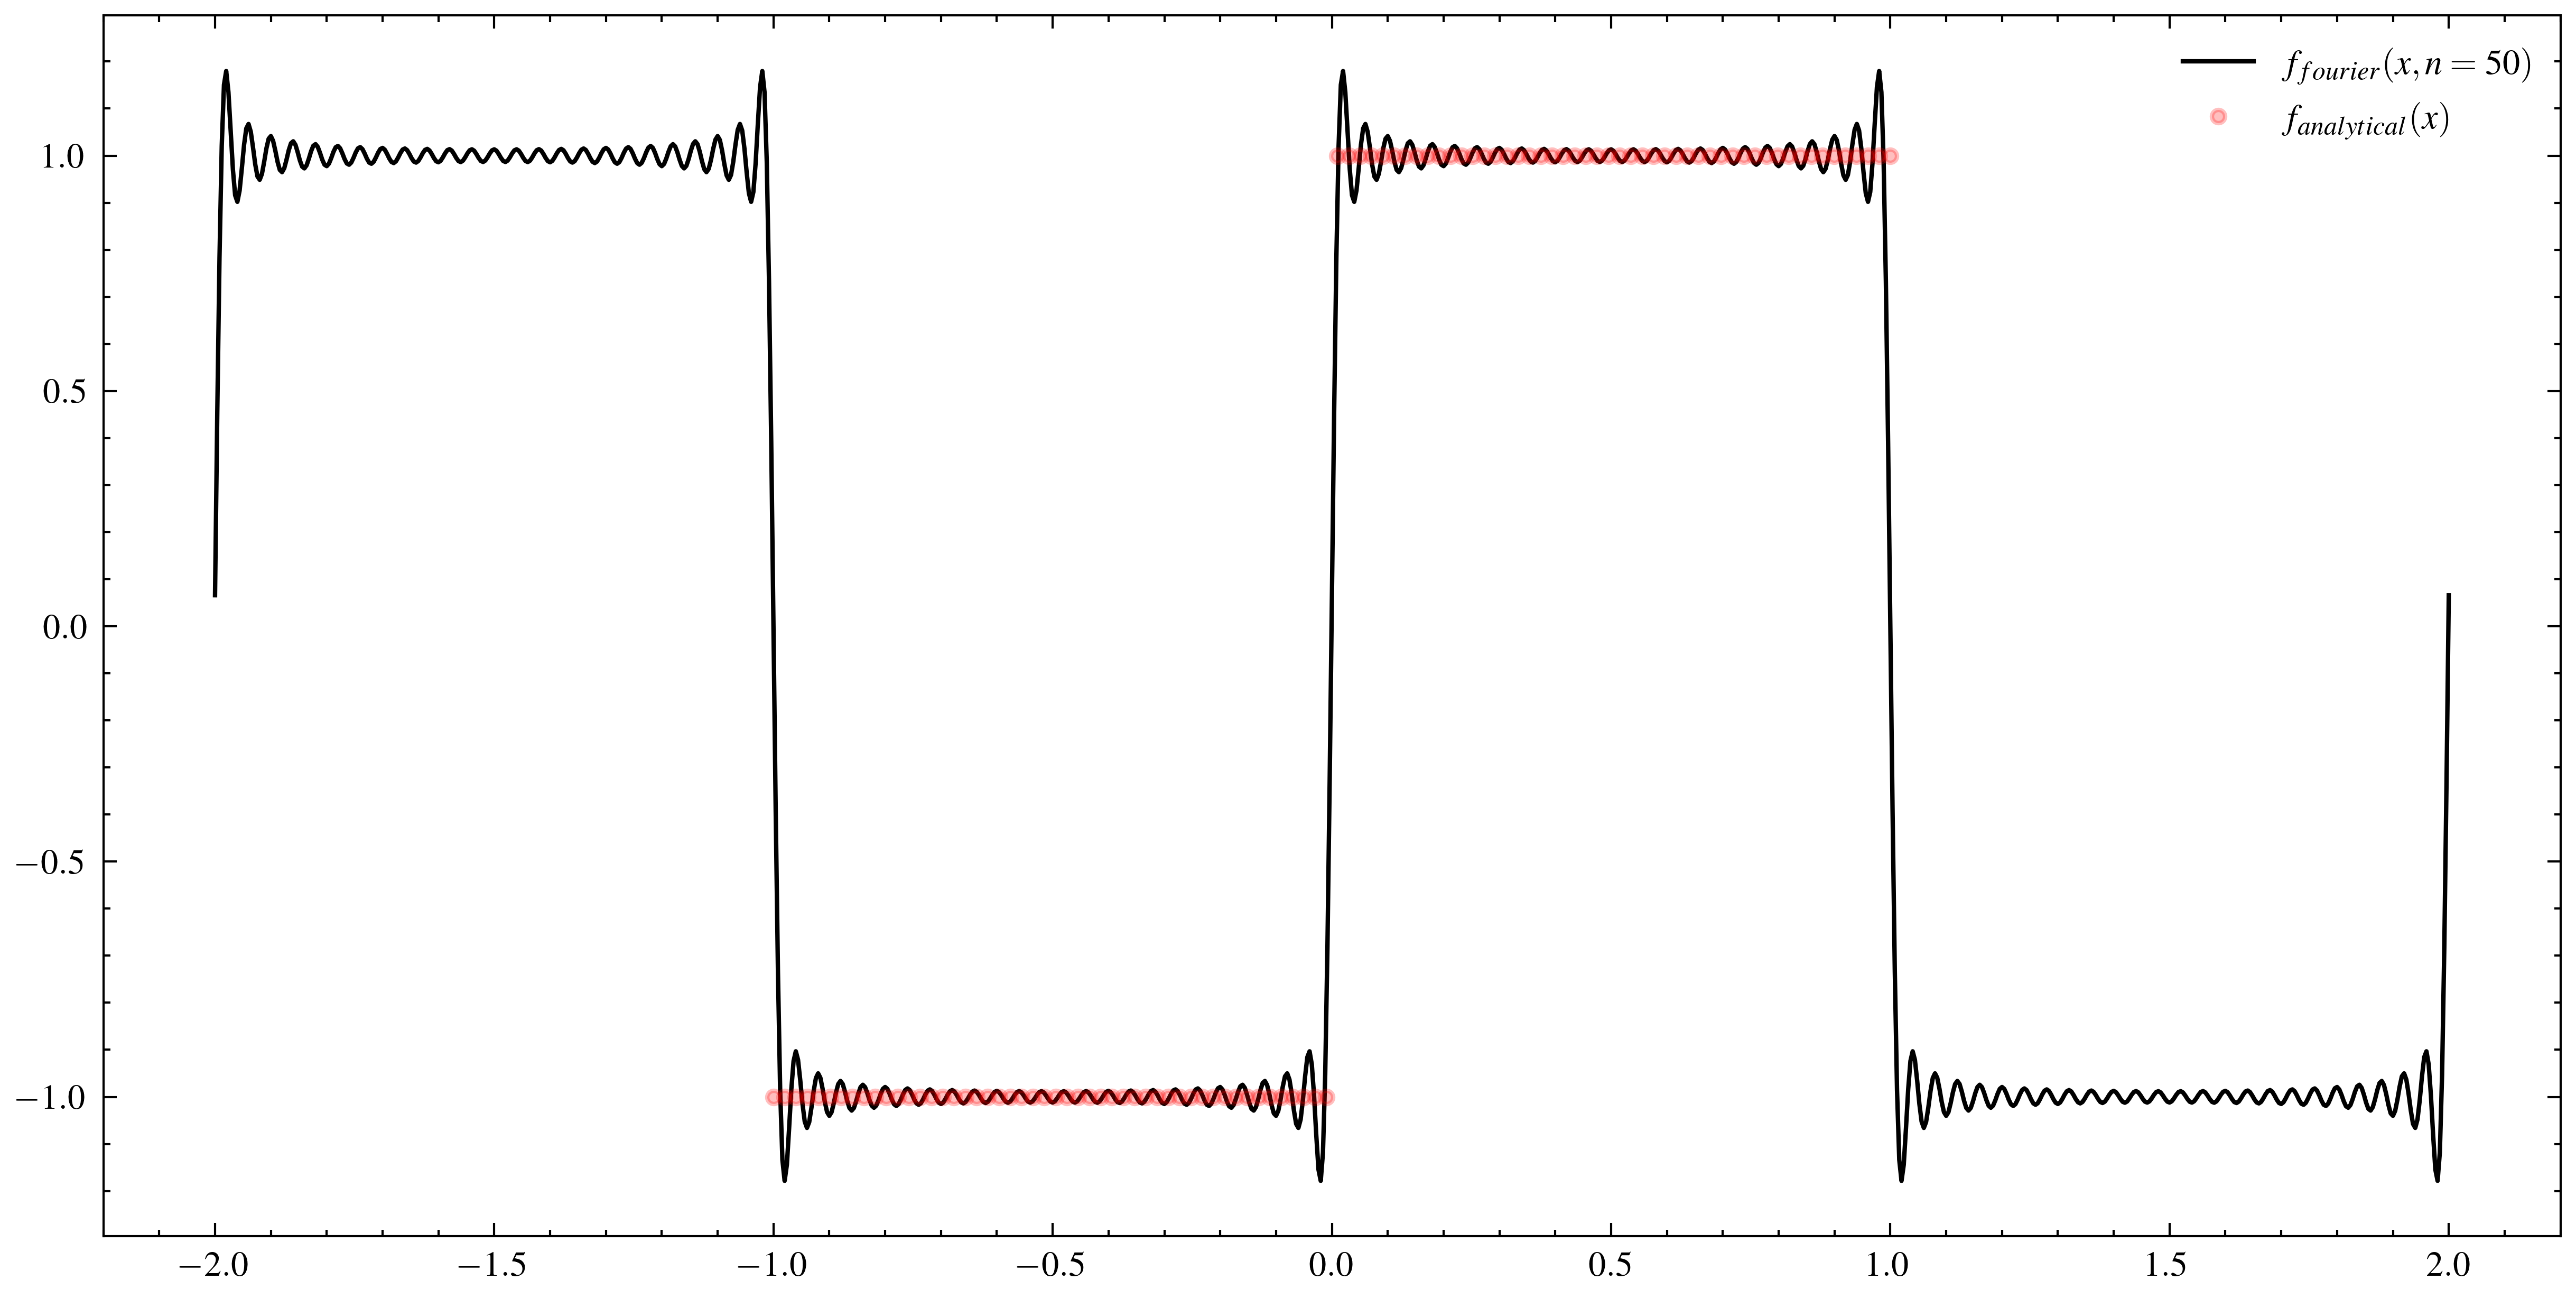

In [12]:
n_coeffcients = [50]

fourier_plot(f, a, b, n_coeffcients, 2*a, 2*b)
